<a href="https://colab.research.google.com/github/nigamsatvik/Major1/blob/master/Covid19_Detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
import os


In [24]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


***SIZE OF TRAINING DATASET***


In [25]:
xclass=["NORMAL","COVID-19","Viral Pneumonia"]
base_path="gdrive/My Drive/COVID-19 Radiography Database/"
for xclass in os.listdir(base_path + "train"):
    print(str(len(os.listdir(base_path + "train/" + xclass))) + " " + xclass + " images")

297 COVID-19 images
1065 NORMAL images
1072 Viral Pneumonia images


***SIZE OF TESTING DATASET***

In [26]:
for xclass in os.listdir(base_path + "test"):
    print(str(len(os.listdir(base_path + "test/" + xclass))) + " " + xclass + " images")

276 NORMAL images
276 Viral Pneumonia images
84 COVID-19 images


***SAMPLE IMAGES***

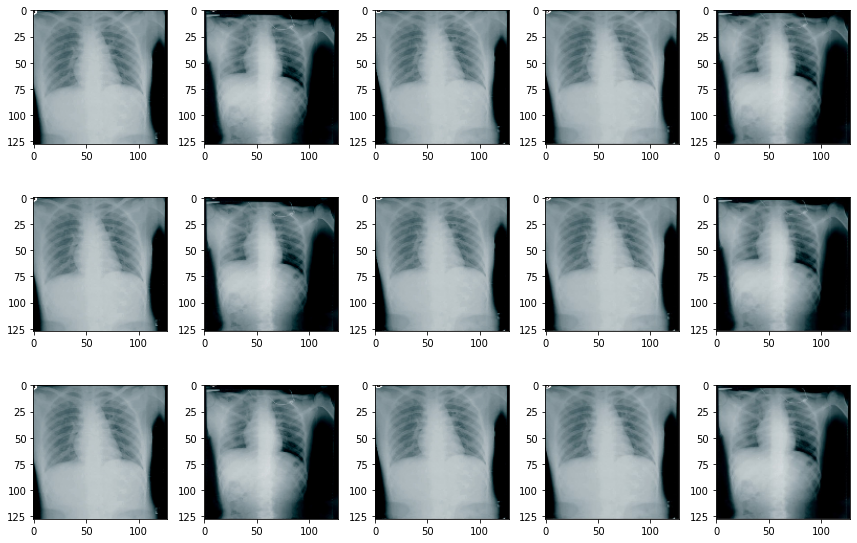

In [27]:
pic_size=128
cpt = 0
plt.figure(figsize=(12,8))
for expression in os.listdir(base_path + "train/"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(3,5,cpt)
        img = load_img(base_path + "train/" + xclass + "/" +os.listdir(base_path + "train/" + xclass)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")
plt.tight_layout()
plt.show()

FEEDING DATA TO MODEL USING ImageDataGenerator FROM KERAS





In [28]:
batch_size = 128

train_data = ImageDataGenerator()
test_data = ImageDataGenerator()

train_generator = train_data.flow_from_directory(base_path + "train",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

test_generator = test_data.flow_from_directory(base_path + "test",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 2434 images belonging to 3 classes.
Found 636 images belonging to 3 classes.
